In [1]:
#  결정트리 - irirs  4개
# orverfit 확률이 크다.... 규제.... deepth를 조정  3

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
ss = StandardScaler()
X =ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
dtc.score(x_train,y_train), dtc.score(x_test,y_test)

(1.0, 1.0)

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

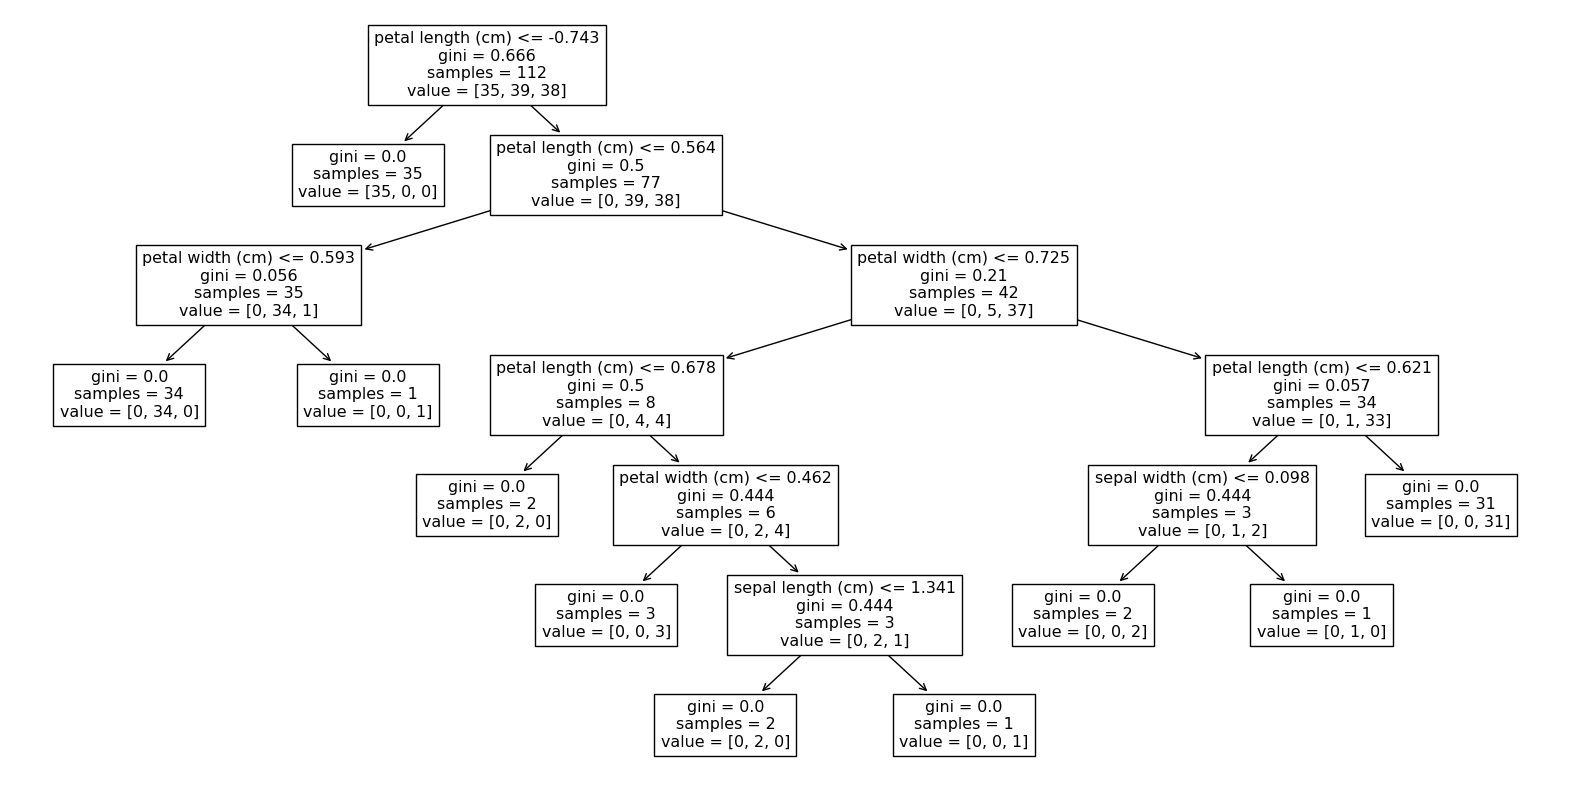

In [13]:

plt.figure(figsize=(20,10))
plot_tree(dtc,feature_names=iris.feature_names)
plt.show()

In [14]:
# 교차검증 - 머신러닝의 평가 방법
from sklearn.model_selection import cross_validate  # cv 5=-fold

In [15]:
scores =  cross_validate(dtc,x_train,y_train)
scores

{'fit_time': array([0.00099564, 0.        , 0.        , 0.        , 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.95652174, 0.95652174, 0.81818182, 0.95454545, 0.95454545])}

In [20]:
scores['test_score'].mean()

0.9280632411067196

In [21]:
# 내부에 cross_validation을 이용해서 전달받은 파라메터의 값을 조정하면서 최상의 모델을 찾아준다.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV #

In [25]:
# cv 교차검증이 필요하면 폴드 갯수를 지정할수 있다.
# help(GridSearchCV)

In [28]:
# 그리드 서치에 대상이 되는 dtc의 파라메터를 한개 설정
# help(DecisionTreeClassifier)
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"]
}
gsc = GridSearchCV(dtc, param_grid=params)

In [29]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [31]:
gsc.cv_results_

{'mean_fit_time': array([0.00059834, 0.00019965, 0.00060329, 0.00020671]),
 'std_fit_time': array([0.00048854, 0.0003993 , 0.00049268, 0.00041342]),
 'mean_score_time': array([0.00019822, 0.00039768, 0.00019932, 0.00039239]),
 'std_score_time': array([0.00039644, 0.00048707, 0.00039864, 0.0004806 ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_splitter': masked_array(data=['best', 'random', 'best', 'random'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'splitter': 'best'},
  {'criterion': 'gini', 'splitter': 'random'},
  {'criterion': 'entropy', 'splitter': 'best'},
  {'criterion': 'entropy', 'splitter': 'random'}],
 'split0_test_score': array([0.95652174, 0.95652174, 0.95652174, 0.95652174]),
 'split1_test_score': array([0.95652174, 1.        , 0.95652174

In [33]:
gsc.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [34]:
best_dtc = gsc.best_estimator_

In [36]:
gsc.best_score_

0.9640316205533598

In [37]:
dtc.feature_importances_

array([0.01787567, 0.01787567, 0.88187037, 0.08237829])

In [45]:
# KFold는 cross_validation의 cv 속성으로 들어가는 sub class 이다.
# cross_validation이 가지고 있는 않은 속성을 셋팅하고 그 객체를 cross_validation에 넣어준다
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold #  

kfold = KFold(n_splits=10, shuffle=True,random_state=42)
cv = cross_validate(dtc,iris.data,iris.target, cv=kfold,return_train_score=True)

In [46]:
cv

{'fit_time': array([0.00099707, 0.        , 0.00100255, 0.0009923 , 0.00099659,
        0.00100279, 0.        , 0.        , 0.00102234, 0.00097251]),
 'score_time': array([0.        , 0.0009973 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00098729, 0.        , 0.        ]),
 'test_score': array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
        0.86666667, 0.86666667, 1.        , 0.93333333, 0.93333333]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [44]:
# help(cross_validate)

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.
    
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitt

In [53]:
# 분할된 인덱스를 직접사용하고 할때
kfold2 =  KFold(n_splits=2,shuffle=True)
for xidx,yidx in kfold2.split(x_train,y_train):
     print(xidx,yidx)   

[  0   1   2   3   9  10  12  15  16  17  18  19  20  22  23  24  27  29
  30  32  35  36  37  38  45  46  48  49  50  53  54  57  58  59  61  64
  69  70  71  72  73  78  79  80  82  83  84  86  89  90  94  96 100 105
 106 111] [  4   5   6   7   8  11  13  14  21  25  26  28  31  33  34  39  40  41
  42  43  44  47  51  52  55  56  60  62  63  65  66  67  68  74  75  76
  77  81  85  87  88  91  92  93  95  97  98  99 101 102 103 104 107 108
 109 110]
[  4   5   6   7   8  11  13  14  21  25  26  28  31  33  34  39  40  41
  42  43  44  47  51  52  55  56  60  62  63  65  66  67  68  74  75  76
  77  81  85  87  88  91  92  93  95  97  98  99 101 102 103 104 107 108
 109 110] [  0   1   2   3   9  10  12  15  16  17  18  19  20  22  23  24  27  29
  30  32  35  36  37  38  45  46  48  49  50  53  54  57  58  59  61  64
  69  70  71  72  73  78  79  80  82  83  84  86  89  90  94  96 100 105
 106 111]
